In [1]:
from tester_rnn import Tester

2024-02-16 12:00:09.192331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/mauricio/.pyenv/versions/3.10.7/envs/bot/lib/python3.10/site-packages/pydantic/_internal/_fields.py:151: UserWarning: Field "model_dir" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [2]:
tester = Tester(
    verbose=True,
    pair="BTCUSDT",
    difficulty="HIGH",
    use_fee=True,
    fee_maker=0.0004,
    fee_taker=0.0004,
    system="NETTING"
)

In [3]:
start = ["2023-10-01", "2023-10-01", "2023-08-01", "2023-12-10", "2023-11-01", "2024-01-27 23:47:00", "2023-01-01"]
end = ["2023-11-19", "2023-10-20", "2023-09-01", "2024-01-10", "2024-01-30", "2024-02-07 05:01:00", "2023-02-13"]
num = 6
tester.test_strategy(
    interval_of_candles="1h",
    start_date_utc=start[num],
    end_date_utc=end[num],
    initial_quote=1000,
    initial_leverage=50
)
#4517

Trying to load info from directory...
Data loaded.
---------------------------------------------------------------------------
Testing strategy | BTCUSDT
---------------------------------------------------------------------------


2023-01-16 07:00:00 | Selling 485.7 quote for 21116.0, leverage 50
2023-01-16 09:00:00 | Selling 477.4 quote for 20757.1, leverage 50
2023-01-16 09:00:00 |  Buying (closing partially) 479.2 quote for 20834.8
2023-01-16 11:00:00 |  Buying (closing) 479.8 quote for 20859.7
2023-01-16 11:00:00 | Buying 478.9 quote for 20821.7, leverage 50
2023-01-16 12:00:00 | Buying 478.2 quote for 20793.2, leverage 50
2023-01-16 13:00:00 | Buying 479.2 quote for 20836.3, leverage 50
2023-01-16 15:00:00 | Buying 479.8 quote for 20862.8, leverage 50
2023-01-16 16:00:00 | Buying 483.0 quote for 21000.6, leverage 50
2023-01-16 16:00:00 |  Selling (closing partially) 483.1 quote for 21004.4
2023-01-16 17:00:00 |  Selling (closing partially) 485.5 quote for 21110.6
2023-01-16 18:00:00 | Buying 489.6 quote for 21286.8, leverage 50
2023-01-16 19:00:00 | Buying 468.9 quote for 21314.4, leverage 50
2023-01-16 20:00:00 |  Selling (closing partially) 489.8 quote for 21294.4
2023-01-16 22:00:00 |  Selling (closing p

479.4739863633723

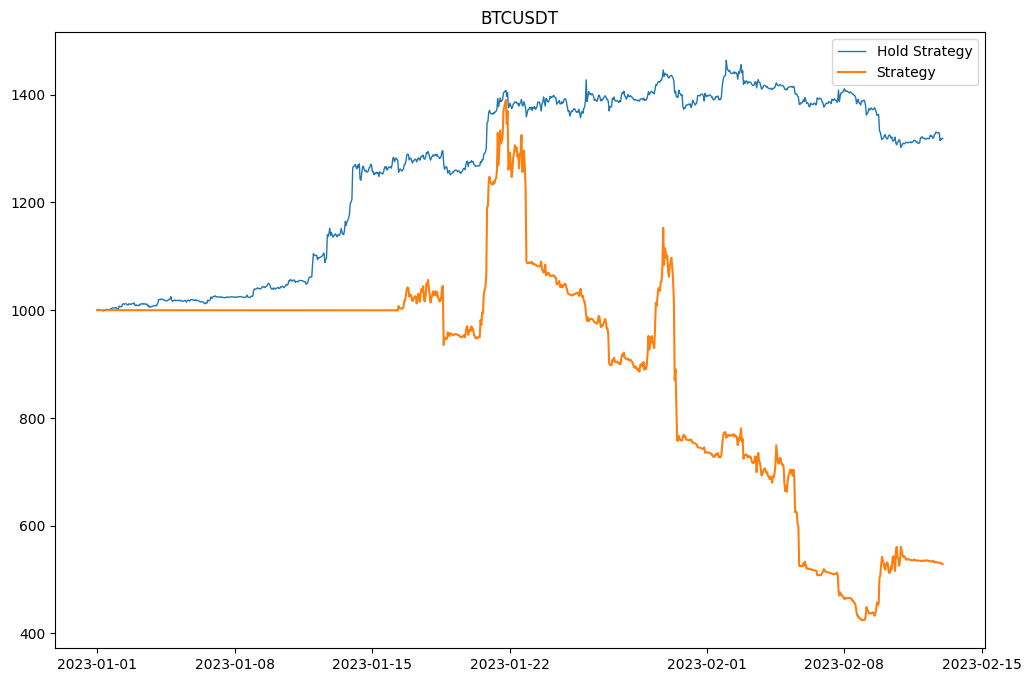

In [10]:
tester.plot_data(show_pos=False, cols=["Hold Strategy"])